### Importando as bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('top10s.csv', encoding='latin1')
df

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [42]:
artistas_mais_ouvidos = df['artist'].value_counts().reset_index()
artistas_mais_ouvidos.columns = ['Artista', 'Quantidade de vezes no top 10']
artistas_mais_ouvidos = artistas_mais_ouvidos.sort_values('Quantidade de vezes no top 10', ascending=False)

artistas_mais_ouvidos_com_genero = pd.merge(artistas_mais_ouvidos, df[['artist', 'top genre']], left_on='Artista', right_on='artist', how='left')
artistas_mais_ouvidos_com_genero.drop(columns=['artist'], inplace=True)
artistas_mais_ouvidos_com_genero = artistas_mais_ouvidos_com_genero.drop_duplicates(subset=['Artista'])

artistas_mais_ouvidos_com_genero.head(20)


,Artista,Quantidade de vezes no top 10,top genre
0,Katy Perry,17,dance pop
17,Justin Bieber,16,canadian pop
33,Rihanna,15,barbadian pop
48,Maroon 5,15,pop
63,Lady Gaga,14,dance pop
77,Bruno Mars,13,pop
90,Shawn Mendes,11,canadian pop
101,Pitbull,11,dance pop
112,Ed Sheeran,11,pop
123,The Chainsmokers,11,electropop


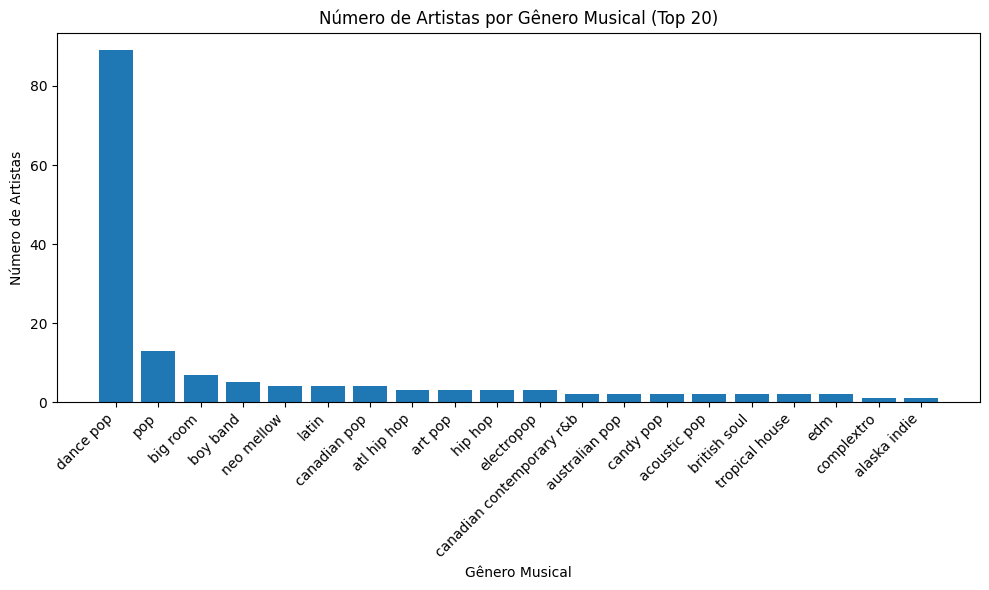

In [47]:
top_20_generos = artistas_mais_ouvidos_com_genero['top genre'].value_counts().head(20)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_20_generos.index, top_20_generos.values)

# Títulos e rótulos
plt.title('Número de Artistas por Gênero Musical (Top 20)')
plt.xlabel('Gênero Musical')
plt.ylabel('Número de Artistas')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Exibe o gráfico
plt.tight_layout()
plt.show()

In [6]:
generos_mais_ouvidos = df['top genre'].value_counts().reset_index()
generos_mais_ouvidos.columns=['Genero', 'Quantidade de vezes no top 10']
generos_mais_ouvidos = generos_mais_ouvidos.sort_values('Quantidade de vezes no top 10', ascending=False)

generos_mais_ouvidos.head(20)

,Genero,Quantidade de vezes no top 10
0,dance pop,327
1,pop,60
2,canadian pop,34
3,barbadian pop,15
4,boy band,15
5,electropop,13
6,british soul,11
7,big room,10
8,canadian contemporary r&b,9
9,neo mellow,9


In [7]:
average_duration = df.groupby('year')['dur'].mean()
pd.DataFrame(average_duration)

,dur
year,
2010,229.803922
2011,242.566038
2012,224.400000
2013,234.492958
2014,224.155172
2015,223.368421
2016,220.225000
2017,222.169231
2018,217.187500


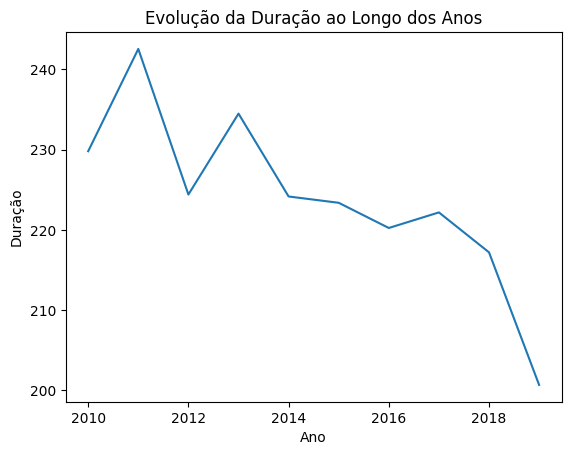

In [8]:
# Criar o gráfico de linha
plt.plot(average_duration.index, average_duration.values)

# Definir os rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Duração')

# Definir o título do gráfico
plt.title('Evolução da Duração ao Longo dos Anos')

# Exibir o gráfico
plt.show()


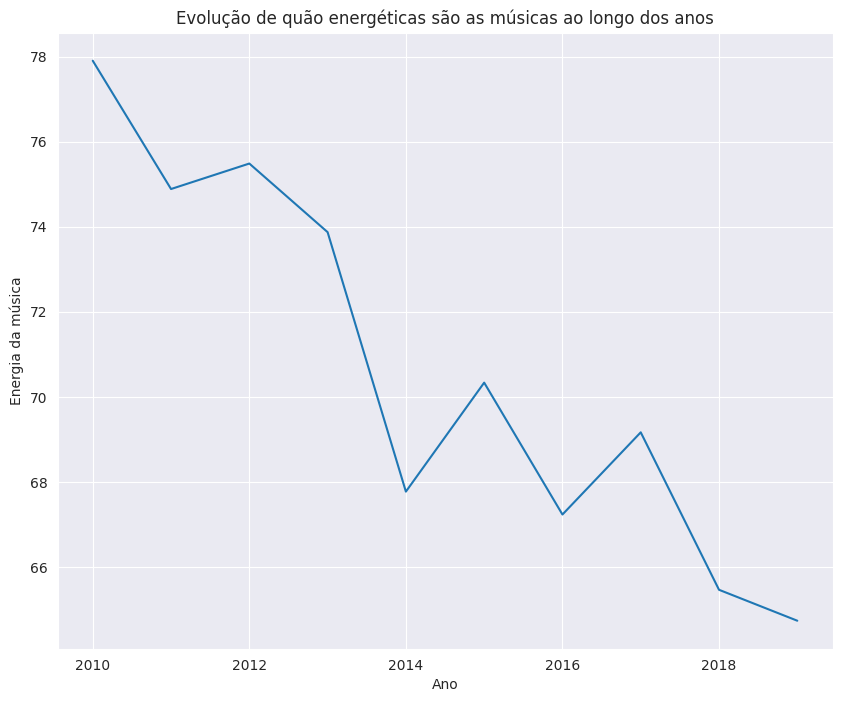

In [53]:
energia_por_ano = df[['nrgy','year']]
energia_por_ano = energia_por_ano.groupby('year').mean()
energia_por_ano

sns.set_style('darkgrid')

# Criar o gráfico de linha
plt.plot(energia_por_ano.index, energia_por_ano.values)

# Definir os rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Energia da música')

# Definir o título do gráfico
plt.title('Evolução de quão energéticas são as músicas ao longo dos anos')

# Exibir o gráfico
plt.show()

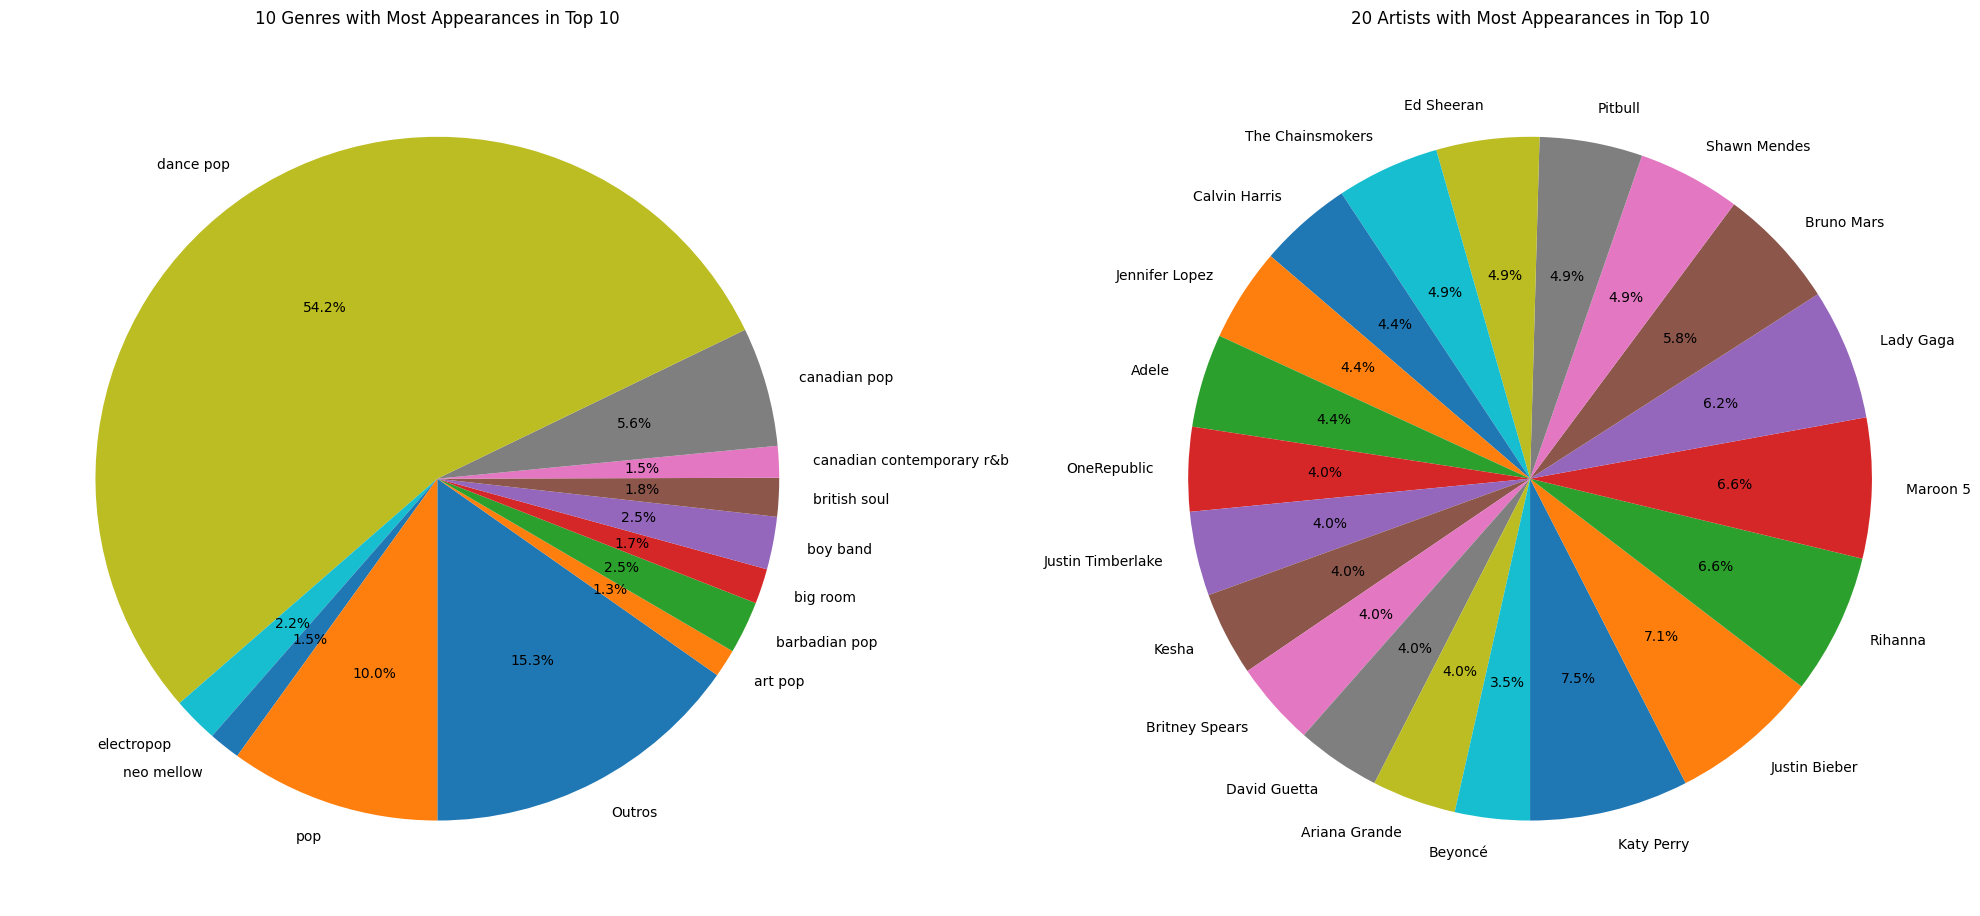

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

generos_mais_ouvidos2 = generos_mais_ouvidos.copy()

mask = generos_mais_ouvidos2['Quantidade de vezes no top 10'] < 8

generos_mais_ouvidos2.loc[mask, 'Genero'] = 'Outros'

generos_mais_ouvidos2 = generos_mais_ouvidos2.groupby('Genero')['Quantidade de vezes no top 10'].sum().reset_index()

axs[0].pie(generos_mais_ouvidos2['Quantidade de vezes no top 10'], labels=generos_mais_ouvidos2['Genero'], autopct='%1.1f%%', startangle=270)
axs[0].set_title('10 Genres with Most Appearances in Top 10', pad=20)

# Plot the pie chart for artists
axs[1].pie(artistas_mais_ouvidos.head(20)['Quantidade de vezes no top 10'], labels=artistas_mais_ouvidos.head(20)['Artista'], autopct='%1.1f%%', startangle=270)
axs[1].set_title('20 Artists with Most Appearances in Top 10', pad=20)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_8704/380271368.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_genres = genre_counts.groupby('year').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


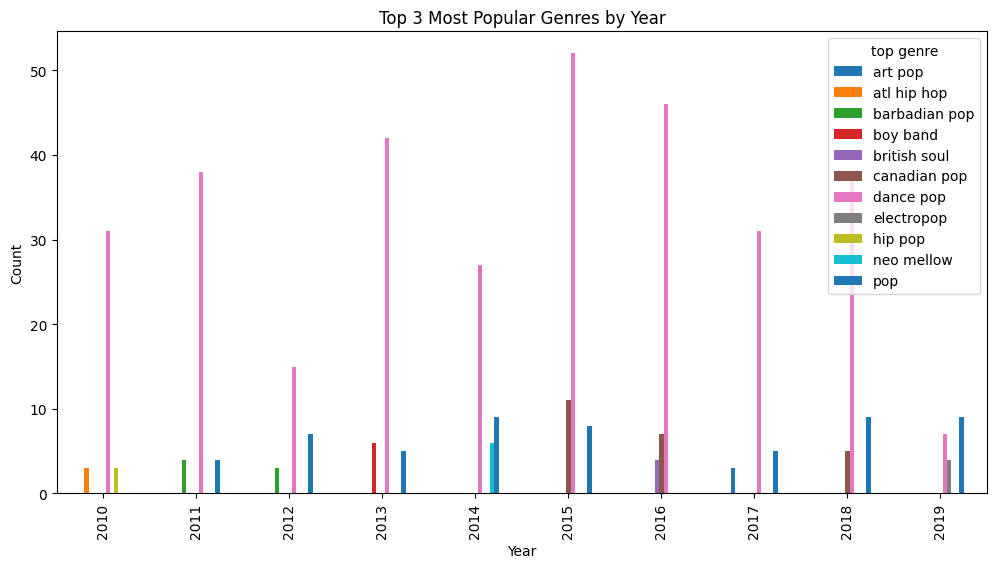

In [12]:
# Group the data by year and genre, and count the occurrences
genre_counts = df.groupby(['year', 'top genre']).size().reset_index(name='count')

# Get the top 3 genres for each year
top3_genres = genre_counts.groupby('year').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Pivot the data to have years as columns and genres as rows
genre_counts_pivot = top3_genres.pivot(index='year', columns='top genre', values='count')

# Plot the bar chart
genre_counts_pivot.plot(kind='bar', stacked=False, figsize=(12, 6))

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top 3 Most Popular Genres by Year')

# Show the plot
plt.show()


In [33]:
# Group the data by year and find the index of the row with the maximum 'pop' value
most_popular_songs = df.groupby('year')['pop'].idxmax()

# Create a new dataframe with the most popular songs of each year
popular_songs_table = df.loc[most_popular_songs, ['year', 'title', 'artist', 'pop','bpm']]
popular_songs_table = popular_songs_table.reset_index(drop=True)

popular_songs_table


,year,title,artist,pop,bpm
0,2010,"Hey, Soul Sister",Train,83,97
1,2011,A Thousand Years,Christina Perri,81,139
2,2012,Titanium (feat. Sia),David Guetta,80,126
3,2013,Underneath the Tree,Kelly Clarkson,88,160
4,2014,All of Me,John Legend,86,120
5,2015,Thinking out Loud,Ed Sheeran,84,79
6,2016,The Hills,The Weeknd,84,113
7,2017,Shape of You,Ed Sheeran,87,96
8,2018,One Kiss (with Dua Lipa),Calvin Harris,86,124
9,2019,Memories,Maroon 5,99,91


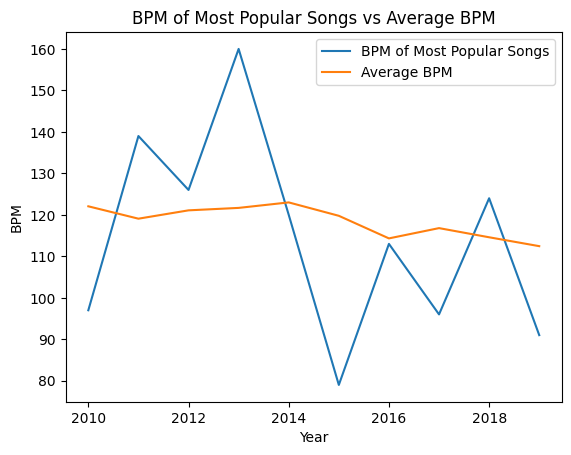

In [22]:

# Get the years and BPM values for the most popular songs
years = popular_songs_table['year']
song_bpm = popular_songs_table['bpm']

# Get the years and average BPM values
average_bpm = df.groupby('year')['bpm'].mean()

# Create the line graph
plt.plot(years, song_bpm, label='BPM of Most Popular Songs')
plt.plot(years, average_bpm, label='Average BPM')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('BPM')
plt.title('BPM of Most Popular Songs vs Average BPM')

# Add a legend
plt.legend()

# Show the graph
plt.show()


In [32]:
# Primeiro, conte o número de músicas no topo para cada artista em cada ano
artist_counts = df.groupby(['year', 'artist','top genre']).size()

# Em seguida, redefina o índice para mover 'year' e 'artist' de volta para colunas
artist_counts = artist_counts.reset_index(name='count')

# Agora, encontre o artista com o maior número de músicas no topo para cada ano
most_popular_artists = artist_counts.loc[artist_counts.groupby('year')['count'].idxmax()]

most_popular_artists


,year,artist,top genre,count
5,2010,Christina Aguilera,dance pop,4
47,2011,Lady Gaga,dance pop,5
70,2012,Katy Perry,dance pop,3
106,2013,Justin Timberlake,dance pop,4
143,2014,Birdy,neo mellow,4
209,2015,Justin Bieber,canadian pop,9
241,2016,Adele,british soul,4
312,2017,DNCE,dance pop,3
382,2018,Shawn Mendes,canadian pop,4
393,2019,Ed Sheeran,pop,5
